# StatArb Pairs: Optimized Mean-Reversion Trading System



 Donwloand & Store the data

In [1]:

import os
from datetime import datetime
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import coint, adfuller
from itertools import combinations
import matplotlib.pyplot as plt
import statsmodels.api as sm
import backtrader as bt
from collections import deque
from tabulate import tabulate
import glob
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import yfinance as yf


In [2]:
# # List of 50 stock tickers
list_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'BRK-A', 'V', 'JPM', 'JNJ', 'WMT', 'UNH', 'MA', 'PG', 'NVDA', 'HD', 'DIS', 'PYPL', 'BAC', 'CMCSA', 'ADBE', 'XOM', 'INTC', 'VZ', 'NFLX', 'T', 'CRM', 'ABT', 'CSCO', 'PEP', 'PFE', 'KO', 'MRK', 'NKE', 'CVX', 'WFC', 'ORCL', 'MCD', 'COST', 'ABBV', 'MDT', 'TMO', 'ACN', 'HON', 'UNP', 'IBM', 'UPS', 'LIN', 'LLY', 'AMT']

# # list of 10 stock tickers
# list_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'BRK-A', 'V', 'JPM', 'JNJ']

# Set start and end times
start_time = '2020-01-01'
end_time = '2023-01-01'

# Create a folder to save data if it doesn't exist
folder_name = 'stock_data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Function to download and save data for a stock
def download_and_save_stock_data(ticker):
    try:
        # Download data
        data = yf.download(ticker, start=start_time, end=end_time)
        
        # Create file name
        file_name = os.path.join(folder_name, f"{ticker}.csv")
        
        # Save data to CSV file
        data.to_csv(file_name)
        print(f"Downloaded and saved data for {ticker}")
    except Exception as e:
        print(f"Error downloading data for {ticker}: {str(e)}")

# Download and save data for all stocks
for ticker in list_tickers:
    download_and_save_stock_data(ticker)

print("Completed downloading data for all stocks.")

C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)
[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for AAPL


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for MSFT


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for GOOGL


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for AMZN


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for META


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for TSLA


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for BRK-A


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for V


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for JPM


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for JNJ


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for WMT


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for UNH


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for MA


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for PG


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for NVDA


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for HD


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for DIS


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for PYPL


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for BAC


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for CMCSA


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for ADBE


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for XOM


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for INTC


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for VZ


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for NFLX


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for T


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for CRM


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for ABT


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for CSCO


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for PEP


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for PFE


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for KO


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for MRK


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for NKE


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for CVX


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for WFC


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for ORCL


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for MCD


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for COST


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for ABBV


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for MDT


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for TMO


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for ACN


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for HON


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for UNP


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for IBM


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for UPS


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for LIN


[*********************100%***********************]  1 of 1 completed
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\4257778276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_time, end=end_time)


Downloaded and saved data for LLY


[*********************100%***********************]  1 of 1 completed

Downloaded and saved data for AMT
Completed downloading data for all stocks.


# Find best 2 Pairs for Pair Trading Strategy ( Cointegration Test, Correlation, ADF Test )

In [3]:
def load_stock_data(ticker, data_folder='stock_data'):
    """Load stock data from CSV file."""
    return pd.read_csv(os.path.join(data_folder, f'{ticker}.csv'), index_col='Date', parse_dates=True)

def calculate_log_spread_and_zscore(stock1, stock2):
    """Calculate log spread and its z-score."""
    log_spread = np.log(stock1['Close']) - np.log(stock2['Close'])
    z_score = (log_spread - log_spread.mean()) / log_spread.std()
    return log_spread, z_score

def analyze_pair(stock1, stock2):
    """Analyze a pair of stocks for cointegration, correlation, and stationarity."""
    log_spread, z_score = calculate_log_spread_and_zscore(stock1, stock2)
    
    # Check Cointegration
    score, pvalue, _ = coint(stock1['Close'], stock2['Close'])
    
    # Calculate Correlation
    correlation = stock1['Close'].corr(stock2['Close'])
    
    # Augmented Dickey-Fuller Test on log spread
    adf_result = adfuller(log_spread)
    
    return {
        'cointegration_pvalue': pvalue,
        'correlation': correlation,
        'adf_pvalue': adf_result[1],
        'log_spread': log_spread,
        'z_score': z_score
    }

def analyze_all_pairs(tickers, data_folder='stock_data'):
    """Analyze all possible pairs from the given list of tickers."""
    results = []
    
    for ticker1, ticker2 in combinations(tickers, 2):
        try:
            stock1 = load_stock_data(ticker1, data_folder)
            stock2 = load_stock_data(ticker2, data_folder)
            
            # Ensure both stocks have the same date range
            common_dates = stock1.index.intersection(stock2.index)
            stock1 = stock1.loc[common_dates]
            stock2 = stock2.loc[common_dates]
            
            result = analyze_pair(stock1, stock2)
            
            results.append({
                'pair': f'{ticker1}-{ticker2}',
                'cointegration_pvalue': result['cointegration_pvalue'],
                'correlation': result['correlation'],
                'adf_pvalue': result['adf_pvalue'],
                'mean_zscore': result['z_score'].mean(),
                'std_zscore': result['z_score'].std()
            })
        except Exception as e:
            print(f"Error analyzing pair {ticker1}-{ticker2}: {str(e)}")
    
    return pd.DataFrame(results)

def filter_suitable_pairs(df_results, cointegration_threshold=0.05, adf_threshold=0.05):
    """Filter pairs suitable for pair trading based on cointegration and stationarity."""
    return df_results[
        (df_results['cointegration_pvalue'] < cointegration_threshold) &
        (df_results['adf_pvalue'] < adf_threshold)
    ].sort_values('correlation', ascending=False)

def find_best_pair(tickers, data_folder='stock_data', cointegration_threshold=0.05, adf_threshold=0.05):
    """Find the best pair for pair trading from the given list of tickers."""
    all_pairs = analyze_all_pairs(tickers, data_folder)
    suitable_pairs = filter_suitable_pairs(all_pairs, cointegration_threshold, adf_threshold)
    
    if suitable_pairs.empty:
        return None, pd.DataFrame()  # Return None and an empty DataFrame instead of a string
    
    best_pair = suitable_pairs.iloc[0]
    stock1, stock2 = best_pair['pair'].split('-')
    
    # Load data for the best pair to calculate additional metrics
    stock1_data = load_stock_data(stock1, data_folder)
    stock2_data = load_stock_data(stock2, data_folder)
    common_dates = stock1_data.index.intersection(stock2_data.index)
    stock1_data = stock1_data.loc[common_dates]
    stock2_data = stock2_data.loc[common_dates]
    
    log_spread, z_score = calculate_log_spread_and_zscore(stock1_data, stock2_data)
    
    return {
        'stock1': stock1,
        'stock2': stock2,
        'correlation': best_pair['correlation'],
        'cointegration_pvalue': best_pair['cointegration_pvalue'],
        'adf_pvalue': best_pair['adf_pvalue'],
        'mean_zscore': best_pair['mean_zscore'],
        'std_zscore': best_pair['std_zscore'],
        'log_spread': log_spread,
        'z_score': z_score
    }, suitable_pairs


#  Pair Trading Strategy

In [4]:
def calculate_spread(stock1, stock2):
    return np.log(stock1['Close']) - np.log(stock2['Close'])

def calculate_half_life(spread):
    spread_lag = spread.shift(1)
    spread_lag.iloc[0] = spread_lag.iloc[1]
    
    spread_ret = spread - spread_lag
    spread_ret.iloc[0] = spread_ret.iloc[1]
    
    spread_lag2 = sm.add_constant(spread_lag)
    
    model = sm.OLS(spread_ret, spread_lag2)
    res = model.fit()
    
    halflife = -np.log(2) / res.params[1]
    
    return halflife

def calculate_kappa_half_life(spread):
    # Calculate Kappa
    spread_lag = spread.shift(1)
    delta_spread = spread - spread_lag
    reg = np.polyfit(spread_lag.dropna(), delta_spread.dropna(), deg=1)
    kappa = -reg[0]
    
    # Calculate Half-Life
    half_life = calculate_half_life(spread)
    
    return kappa, half_life

def calculate_kappa_and_half_life(stock1_data, stock2_data, plot=True):
    # Ensure both stocks have the same date range
    common_dates = stock1_data.index.intersection(stock2_data.index)
    stock1_data = stock1_data.loc[common_dates]
    stock2_data = stock2_data.loc[common_dates]
    
    # Calculate spread
    spread = calculate_spread(stock1_data, stock2_data)
    
    # Calculate Kappa and Half-Life
    kappa, half_life = calculate_kappa_half_life(spread)
    
    if plot:
        # Plot the spread
        plt.figure(figsize=(12, 6))
        plt.plot(spread)
        plt.title(f'Price Spread')
        plt.xlabel('Date')
        plt.ylabel('Spread')
        plt.show()
    
    return kappa, half_life

# Pair Trading Strategy ( Z-Score, Entry, Exit, Profit )


In [5]:

class PairTradingStrategy(bt.Strategy):
    params = (
        ('lookback', 20),
        ('entry_threshold', 1.5),  # Entry threshold in terms of standard deviations
        ('stoploss_factor', 2.0),  # Stop-loss threshold in terms of standard deviations
        ('holding_time_factor', 1.5),  # Factor to determine max holding time based on half-life
        ('half_life', 14),  # Estimated half-life of mean reversion in days
        ('stock1', None),
        ('stock2', None),
    )

    def __init__(self):
        # Get the data for the two stocks
        self.stock1 = self.getdatabyname(self.params.stock1)
        self.stock2 = self.getdatabyname(self.params.stock2)

        # Initialize spread and mean/std
        self.spread_history = []
        self.mean = None
        self.std = None
        self.entry_price = None
        self.entry_date = None
        self.entry_price1 = None
        self.entry_price2 = None

        # Calculate max holding time
        self.max_holding_time = int(self.params.holding_time_factor * self.params.half_life)

        # Custom metrics tracking
        self.trades = []
        self.equity_curve = [self.broker.getvalue()]
        self.returns = deque(maxlen=252)
        self.max_drawdown = 0
        self.peak = self.broker.getvalue()

    def next(self):
        # Calculate the spread - FIX: Use correct column names
        try:
            spread = np.log(self.stock1.close[0]) - np.log(self.stock2.close[0])
            self.spread_history.append(spread)
        except Exception as e:
            print(f"Error calculating spread: {e}")
            return

        # Wait until we have enough data
        if len(self.spread_history) <= self.params.lookback:
            return

        # Calculate mean and standard deviation
        self.mean = np.mean(self.spread_history[-self.params.lookback:])
        self.std = np.std(self.spread_history[-self.params.lookback:])

        if self.std == 0:
            return

        # Calculate trading thresholds
        buy_threshold = self.mean - self.params.entry_threshold * self.std
        sell_threshold = self.mean + self.params.entry_threshold * self.std

        # Trading logic
        if not self.position:  # No existing position
            if spread < buy_threshold:
                self.buy(data=self.stock1)
                self.sell(data=self.stock2)
                self.entry_price = spread
                self.entry_date = len(self)
                self.entry_price1 = self.stock1.close[0]
                self.entry_price2 = self.stock2.close[0]
                self.log_trade('ENTRY LONG')
            elif spread > sell_threshold:
                self.sell(data=self.stock1)
                self.buy(data=self.stock2)
                self.entry_price = spread
                self.entry_date = len(self)
                self.entry_price1 = self.stock1.close[0]
                self.entry_price2 = self.stock2.close[0]
                self.log_trade('ENTRY SHORT')
        else:  # Existing position
            days_since_entry = len(self) - self.entry_date
            
            # Exit logic
            exit_condition = False
            exit_reason = ""
            
            # Mean reversion exit
            if (self.position.size > 0 and spread >= self.mean) or \
               (self.position.size < 0 and spread <= self.mean):
                exit_condition = True
                exit_reason = "Spread Reversion"
            # Max holding time exit
            elif days_since_entry >= self.max_holding_time:
                exit_condition = True
                exit_reason = "Max Holding Time"
            # Stop-loss exit
            elif abs(spread - self.entry_price) > (self.params.stoploss_factor * self.std):
                exit_condition = True
                exit_reason = "Stop-Loss Hit"
            
            if exit_condition:
                self.close(data=self.stock1)
                self.close(data=self.stock2)
                self.log_trade('EXIT', days_since_entry, reason=exit_reason)
                self.entry_price = None
                self.entry_date = None
                return

        # Update metrics
        current_value = self.broker.getvalue()
        self.equity_curve.append(current_value)
        
        if len(self.equity_curve) > 1:
            daily_return = (current_value - self.equity_curve[-2]) / self.equity_curve[-2]
            self.returns.append(daily_return)
        
        if current_value > self.peak:
            self.peak = current_value
        dd = (self.peak - current_value) / self.peak
        if dd > self.max_drawdown:
            self.max_drawdown = dd

    def log_trade(self, action, days_held=None, reason=None):
        if action.startswith('ENTRY'):
            # Entry already logged in next() method
            pass
        elif action in ['EXIT', 'STOP-LOSS']:
            try:
                exit_price1 = self.stock1.close[0]
                exit_price2 = self.stock2.close[0]
                
                # Calculate PnL
                pnl = self.broker.getvalue() - self.equity_curve[-2] if len(self.equity_curve) > 1 else 0
                pnl_pct = (pnl / self.equity_curve[-2]) * 100 if len(self.equity_curve) > 1 and self.equity_curve[-2] != 0 else 0
                
                self.trades.append({
                    'entry_date': self.entry_date,
                    'exit_date': len(self),
                    'days_held': days_held,
                    'pnl': pnl,
                    'pnl_pct': pnl_pct,
                    'entry_price1': self.entry_price1,
                    'entry_price2': self.entry_price2,
                    'exit_price1': exit_price1,
                    'exit_price2': exit_price2,
                    'exit_type': action,
                    'exit_reason': reason
                })
            except Exception as e:
                print(f"Error logging trade: {e}")

    def stop(self):
        # Calculate final metrics
        self.total_trades = len(self.trades)
        self.winning_trades = sum(1 for trade in self.trades if trade.get('pnl', 0) > 0)
        self.losing_trades = sum(1 for trade in self.trades if trade.get('pnl', 0) <= 0)
        self.win_rate = self.winning_trades / self.total_trades if self.total_trades > 0 else 0

        self.total_return = (self.equity_curve[-1] - self.equity_curve[0]) / self.equity_curve[0] if self.equity_curve else 0
        self.mean_return = np.mean(self.returns) if self.returns else 0
        self.std_return = np.std(self.returns) if self.returns else 0
        self.sharpe_ratio = np.sqrt(252) * self.mean_return / self.std_return if self.std_return != 0 else 0

        # Store all metrics in a dictionary for easy access
        self.metrics = {
            'Initial Capital': self.equity_curve[0] if self.equity_curve else 0,
            'Final Portfolio Value': self.equity_curve[-1] if self.equity_curve else 0,
            'Total Return (%)': self.total_return * 100,
            'Sharpe Ratio': self.sharpe_ratio,
            'Max Drawdown (%)': self.max_drawdown * 100,
            'Total Trades': self.total_trades,
            'Winning Trades': self.winning_trades,
            'Losing Trades': self.losing_trades,
            'Win Rate (%)': self.win_rate * 100,
            'Mean Daily Return (%)': self.mean_return * 100,
            'Std Dev of Daily Return (%)': self.std_return * 100
        }


# BacktestEngine

In [6]:
class BacktestEngine:
    def __init__(self, strategy_class, df1, df2, initial_capital=100000, commission=0.001):
        self.cerebro = bt.Cerebro()
        self.strategy_class = strategy_class
        self.df1 = df1
        self.df2 = df2
        self.initial_capital = initial_capital
        self.commission = commission
        self.results = None
        self.cerebro.broker.setcash(initial_capital)
        self.cerebro.broker.setcommission(commission=commission)

    def add_data(self):
        data1 = bt.feeds.PandasData(dataname=self.df1, name="stock1")
        data2 = bt.feeds.PandasData(dataname=self.df2, name="stock2")
        self.cerebro.adddata(data1)
        self.cerebro.adddata(data2)

    def set_strategy(self, **kwargs):
        self.cerebro.addstrategy(self.strategy_class, **kwargs)

    def set_broker(self, initial_capital=None, commission=None):
        if initial_capital is not None:
            self.cerebro.broker.setcash(initial_capital)
        if commission is not None:
            self.cerebro.broker.setcommission(commission=commission)

    def run(self):
        self.add_data()
        self.set_broker()
        self.results = self.cerebro.run()

    def get_metrics(self):
        if not self.results:
            return {"Error": "No backtest results available. Please run the backtest first."}

        strat = self.results[0]
        
        if not hasattr(strat, 'metrics'):
            return {"Error": "No metrics found in the strategy. Make sure to implement custom metrics in your strategy."}
        
        return strat.metrics

    def print_metrics(self):
        metrics = self.get_metrics()
        if isinstance(metrics, dict) and "Error" in metrics:
            print(metrics["Error"])
            return

        table_data = [["Metric", "Value"]]
        for key, value in metrics.items():
            if isinstance(value, float):
                table_data.append([key, f"{value:.2f}"])
            else:
                table_data.append([key, value])

        print("\nBacktest Results:")
        print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

    def print_trade_table(self, num_trades=None):
        if not self.results:
            print("No results available. Make sure to run the backtest first.")
            return
        
        strat = self.results[0]
        if not hasattr(strat, 'trades'):
            print("No trade information found in the strategy. Make sure to log trades in your strategy.")
            return

        trades = strat.trades
        if num_trades is not None:
            trades = trades[:num_trades]
        
        if not trades:
            print("No trades executed.")
            return
        
        trade_data = []
        for trade in trades:
            trade_data.append([
                trade.get('entry_date', 'N/A'),
                trade.get('exit_date', 'N/A'),
                trade.get('days_held', 'N/A'),
                f"{trade.get('pnl', 'N/A'):.2f}",
                f"{trade.get('pnl_pct', 'N/A'):.2f}%",
                f"{trade.get('entry_price1', 'N/A'):.2f}",
                f"{trade.get('entry_price2', 'N/A'):.2f}",
                f"{trade.get('exit_price1', 'N/A'):.2f}",
                f"{trade.get('exit_price2', 'N/A'):.2f}",
                trade.get('exit_type', 'N/A'), 
                trade.get('exit_reason', 'N/A')
            ])
        
        headers = ["Entry Date", "Exit Date", "Days Held", "PnL", "PnL %", 
                   "Entry Price 1", "Entry Price 2", "Exit Price 1", "Exit Price 2", "Exit Type", "Exit Reason"]
        
        print("\nTrade History:")
        print(tabulate(trade_data, headers=headers, tablefmt="grid"))

    def plot_equity_curve(self):
        if not self.results:
            print("No results available. Make sure to run the backtest first.")
            return
        
        strat = self.results[0]
        if not hasattr(strat, 'equity_curve'):
            print("No equity curve data found in the strategy.")
            return
        
        # Convert equity curve to pandas Series
        equity_curve = pd.Series(strat.equity_curve, index=self.df1.index[:len(strat.equity_curve)])
        
        # Calculate drawdown
        drawdown = (equity_curve.cummax() - equity_curve) / equity_curve.cummax()
        
        # Create figure with two subplots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})
        fig.suptitle('Equity Curve and Drawdown', fontsize=16)
        
        # Plot equity curve
        ax1.plot(equity_curve.index, equity_curve.values, label='Equity Curve', color='blue')
        ax1.set_title('Equity Curve')
        ax1.set_ylabel('Portfolio Value')
        ax1.legend()
        ax1.grid(True)
        
        # Plot drawdown
        ax2.fill_between(drawdown.index, drawdown.values, 0, alpha=0.3, color='red', label='Drawdown')
        ax2.set_title('Drawdown')
        ax2.set_ylabel('Drawdown')
        ax2.set_xlabel('Date')
        ax2.legend()
        ax2.grid(True)
        
        # Format x-axis
        plt.gcf().autofmt_xdate()
        
        # Add strategy performance metrics as text
        metrics = self.get_metrics()
        if isinstance(metrics, dict) and "Error" not in metrics:
            metrics_text = (f"Total Return: {metrics['Total Return (%)']:.2f}%\n"
                            f"Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}\n"
                            f"Max Drawdown: {metrics['Max Drawdown (%)']:.2f}%\n"
                            f"Win Rate: {metrics['Win Rate (%)']:.2f}%")
            fig.text(0.02, 0.02, metrics_text, fontsize=10, va='bottom')
        
        # Adjust layout
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        
        # Show plot
        plt.show()

    def plot_results(self):
        if not self.results:
            print("No results available. Make sure to run the backtest first.")
            return

        plt.figure(figsize=(12, 6))
        plt.subplot(2, 1, 1)
        self.cerebro.plot(style='candlestick')
        plt.title('Backtest Results')
        
        plt.subplot(2, 1, 2)
        strat = self.results[0]
        if hasattr(strat, 'equity_curve'):
            plt.plot(strat.equity_curve)
            plt.title('Portfolio Value Over Time')
        else:
            print("No equity curve data found in the strategy.")
        
        plt.tight_layout()
        plt.show()


# Backtest Pair Trading Strategy

In [7]:
folder = "stock_data"

# Desired clean header
clean_header = ["Date", "Close", "High", "Low", "Open", "Volume"]

# Loop through all CSV files
for file in glob.glob(os.path.join(folder, "*.csv")):
    print(f"Cleaning: {file}")

    # Read the real header (3rd row)
    df = pd.read_csv(file, header=2)

    # Apply clean header
    df.columns = clean_header

    # Save back to the SAME file
    df.to_csv(file, index=False)

print("✔ All CSV files cleaned and overwritten.")

Cleaning: stock_data\AAPL.csv
Cleaning: stock_data\ABBV.csv
Cleaning: stock_data\ABT.csv
Cleaning: stock_data\ACN.csv
Cleaning: stock_data\ADBE.csv
Cleaning: stock_data\AMT.csv
Cleaning: stock_data\AMZN.csv
Cleaning: stock_data\BAC.csv
Cleaning: stock_data\BRK-A.csv
Cleaning: stock_data\CMCSA.csv
Cleaning: stock_data\COST.csv
Cleaning: stock_data\CRM.csv
Cleaning: stock_data\CSCO.csv
Cleaning: stock_data\CVX.csv
Cleaning: stock_data\DIS.csv
Cleaning: stock_data\GOOGL.csv
Cleaning: stock_data\HD.csv
Cleaning: stock_data\HON.csv
Cleaning: stock_data\IBM.csv
Cleaning: stock_data\INTC.csv
Cleaning: stock_data\JNJ.csv
Cleaning: stock_data\JPM.csv
Cleaning: stock_data\KO.csv
Cleaning: stock_data\LIN.csv
Cleaning: stock_data\LLY.csv
Cleaning: stock_data\MA.csv
Cleaning: stock_data\MCD.csv
Cleaning: stock_data\MDT.csv
Cleaning: stock_data\META.csv
Cleaning: stock_data\MRK.csv
Cleaning: stock_data\MSFT.csv
Cleaning: stock_data\NFLX.csv
Cleaning: stock_data\NKE.csv
Cleaning: stock_data\NVDA.csv



Backtest Results:
+-----------------------------+-----------+
| Metric                      |     Value |
+=============================+===========+
| Initial Capital             | 100000    |
+-----------------------------+-----------+
| Final Portfolio Value       | 100069    |
+-----------------------------+-----------+
| Total Return (%)            |      0.07 |
+-----------------------------+-----------+
| Sharpe Ratio                |     -0.4  |
+-----------------------------+-----------+
| Max Drawdown (%)            |      0.06 |
+-----------------------------+-----------+
| Total Trades                |     51    |
+-----------------------------+-----------+
| Winning Trades              |     43    |
+-----------------------------+-----------+
| Losing Trades               |      8    |
+-----------------------------+-----------+
| Win Rate (%)                |     84.31 |
+-----------------------------+-----------+
| Mean Daily Return (%)       |     -0    |
+------------

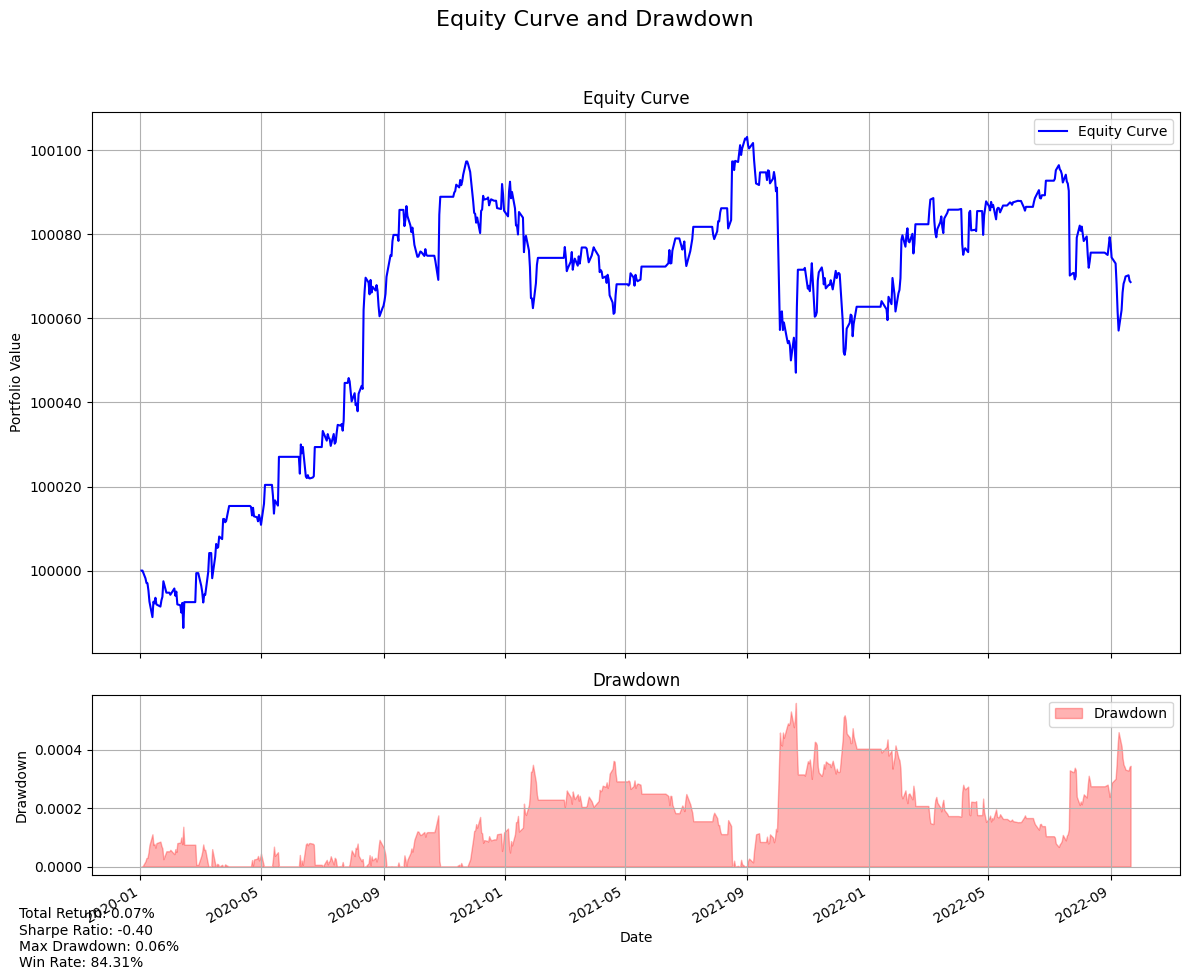

<IPython.core.display.Javascript object>

c:\Users\bhand\AppData\Local\Programs\Python\Python312\Lib\site-packages\backtrader\plot\plot.py:821: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.mpyplot.show()
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\1199559721.py:171: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\1199559721.py:172: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


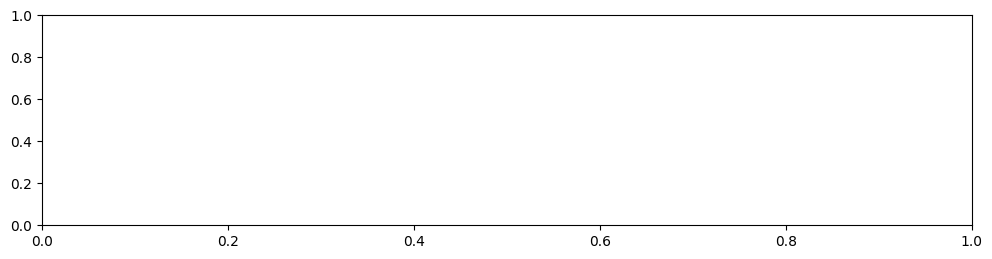

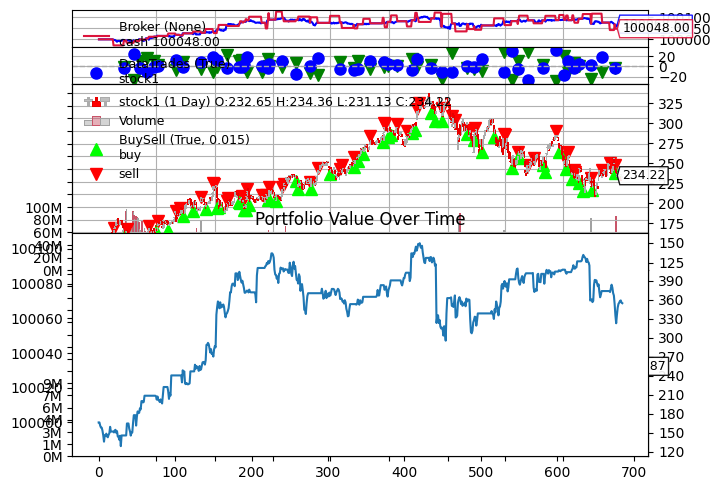

In [8]:
def main_backtest():
    # Define all parameters
    params = {
        # Data parameters
        'stock1': "MSFT",
        'stock2': "ACN",
        'start_date': '2020-01-01',
        'end_date': '2023-01-01',
        
        # Strategy parameters
        'lookback': 20,
        'entry_threshold': 1.5,
        'stoploss_factor': 2.0,
        'holding_time_factor': 1.5,
        'kappa': 0.06,
        'half_life': 12.25,
        
        # Backtest parameters
        'initial_capital': 100000,
        'commission': 0.001,
    }
    
    # Load data
    try:
        df1 = pd.read_csv(f'stock_data/{params["stock1"]}.csv', index_col='Date', parse_dates=True)
        df2 = pd.read_csv(f'stock_data/{params["stock2"]}.csv', index_col='Date', parse_dates=True)
    except FileNotFoundError as e:
        print(f"Error loading data: {e}")
        print("Make sure you've run the data cleaning step first.")
        return
    
    # Ensure both stocks have the same date range
    common_dates = df1.index.intersection(df2.index)
    df1 = df1.loc[common_dates]
    df2 = df2.loc[common_dates]
    
    # Calculate Kappa and Half-Life if not provided
    if params['kappa'] is None or params['half_life'] is None:
        params['kappa'], params['half_life'] = calculate_kappa_and_half_life(df1, df2, plot=False)
        print(f"Calculated Kappa: {params['kappa']:.2f}")
        print(f"Calculated Half-Life: {params['half_life']:.2f}")
    
    # Create BacktestEngine instance
    engine = BacktestEngine(
        strategy_class=PairTradingStrategy,
        df1=df1,
        df2=df2,
        initial_capital=params['initial_capital']
    )

    # Set strategy parameters
    engine.set_strategy(
        lookback=int(params['lookback']),
        entry_threshold=params['entry_threshold'],
        stoploss_factor=params['stoploss_factor'],
        holding_time_factor=params['holding_time_factor'],
        half_life=params['half_life'],
        stock1="stock1",
        stock2="stock2"
    )

    # Run the backtest
    engine.run()

    # Get and print metrics
    engine.print_metrics()

    # Plot the equity curve
    engine.plot_equity_curve()

    # Plot the results
    engine.plot_results()

if __name__ == "__main__":
    main_backtest()

# Bayesian optimization to find best parameters

In [9]:
def objective(params, df1, df2, initial_capital=100000, commission=0.001):
    lookback, entry_threshold, stoploss_factor, holding_time_factor, half_life = params
    
    engine = BacktestEngine(
        strategy_class=PairTradingStrategy,
        df1=df1,
        df2=df2,
        initial_capital=initial_capital
    )
    
    engine.set_strategy(
        lookback=int(lookback),
        entry_threshold=entry_threshold,
        stoploss_factor=stoploss_factor,
        holding_time_factor=holding_time_factor,
        half_life=half_life,
        stock1="stock1",
        stock2="stock2"
    )
    
    engine.run()
    metrics = engine.get_metrics()
    
    # We want to maximize Sharpe Ratio, so we return its negative
    return -metrics.get('Sharpe Ratio', 0)

def bayesian_optimization(df1, df2, param_ranges, n_calls=50, initial_capital=100000, commission=0.001):
    space = [
        Integer(param_ranges['lookback'][0], param_ranges['lookback'][1], name='lookback'),
        Real(param_ranges['entry_threshold'][0], param_ranges['entry_threshold'][1], name='entry_threshold'),
        Real(param_ranges['stoploss_factor'][0], param_ranges['stoploss_factor'][1], name='stoploss_factor'),
        Real(param_ranges['holding_time_factor'][0], param_ranges['holding_time_factor'][1], name='holding_time_factor'),
    ]
    
    fixed_half_life = param_ranges['half_life'][0]
    
    @use_named_args(space)
    def objective_wrapper(**params):
        params_list = list(params.values()) + [fixed_half_life]
        return objective(params_list, df1, df2, initial_capital, commission)
    
    def callback(res):
        n = len(res.x_iters)
        print(f"Optimization progress: {n / n_calls * 100:.2f}%")
    
    result = gp_minimize(objective_wrapper, space, n_calls=n_calls, random_state=42, callback=callback)
    
    best_params = {
        'lookback': int(result.x[0]),
        'entry_threshold': result.x[1],
        'stoploss_factor': result.x[2],
        'holding_time_factor': result.x[3],
        'half_life': fixed_half_life
    }
    
    return best_params, -result.fun  # Return best parameters and best Sharpe Ratio

# Run to find best parameters

In [10]:
def main_optimization():
    # Find the best pair for pair trading
    print("*" * 50)
    print("Finding the best pair for pair trading...")
    best_pair, suitable_pairs = find_best_pair(list_tickers)
    print("Completed pair analysis.")
    print("*" * 50)
    
    if best_pair is None:
        print("No suitable pairs found for pair trading.")
        return
    
    # Get the best pair
    stock1 = best_pair['stock1']
    stock2 = best_pair['stock2']

    # Load data from CSV files
    start_date = "2020-01-01"
    end_date = "2023-01-01"
    
    try:
        df1 = pd.read_csv(f'stock_data/{stock1}.csv', index_col='Date', parse_dates=True)
        df2 = pd.read_csv(f'stock_data/{stock2}.csv', index_col='Date', parse_dates=True)
        
        # Filter by date range
        df1 = df1[(df1.index >= start_date) & (df1.index <= end_date)]
        df2 = df2[(df2.index >= start_date) & (df2.index <= end_date)]
        
    except FileNotFoundError:
        print(f"Error: Could not find data for {stock1} or {stock2}")
        print("Make sure you've downloaded and cleaned the data first.")
        return
    
    # Ensure both stocks have the same date range
    common_dates = df1.index.intersection(df2.index)
    df1 = df1.loc[common_dates]
    df2 = df2.loc[common_dates]
    
    if len(df1) == 0 or len(df2) == 0:
        print("Error: No common dates found between the two stocks")
        return
    
    # Calculate kappa and half life
    kappa, half_life = calculate_kappa_and_half_life(df1, df2, plot=False)
    
    # Print CONFIG before optimization
    print("*" * 50)
    print("Stock Pair for Pair Trading:")
    print(f'Stock 1: {stock1}')
    print(f'Stock 2: {stock2}')
    print(f'Kappa: {kappa:.2f}')
    print(f'Half-Life: {half_life:.2f}')
    print("*" * 50)
    
    # Define parameter ranges for Bayesian optimization
    param_ranges = {
        'lookback': [5, 30],  # min, max
        'entry_threshold': [1.5, 3.0],
        'stoploss_factor': [1.5, 3.0],
        'holding_time_factor': [1.0, 2.0],
        'half_life': [half_life]  # Use the calculated half_life
    }
    
    # Run Bayesian optimization
    print("Starting Bayesian optimization...")
    best_params, best_sharpe = bayesian_optimization(df1, df2, param_ranges, n_calls=30)
    
    print("*" * 50)
    print("\nBest parameters found:")
    for key, value in best_params.items():
        print(f"{key}: {value}")
    print(f"Best Sharpe Ratio: {best_sharpe:.4f}")
    print("*" * 50)
    
    # Run final backtest with best parameters
    final_engine = BacktestEngine(
        strategy_class=PairTradingStrategy,
        df1=df1,
        df2=df2,
        initial_capital=100000
    )
    
    # Add stock names to best_params
    best_params['stock1'] = "stock1"
    best_params['stock2'] = "stock2"
    
    final_engine.set_strategy(**best_params)
    final_engine.run()
    
    print("*" * 50)
    print("\nFinal Backtest Results:")
    final_engine.print_metrics()
    final_engine.print_trade_table(num_trades=10)
    final_engine.plot_equity_curve()
    print("*" * 50)

if __name__ == "__main__":
    main_optimization()

**************************************************
Finding the best pair for pair trading...
Completed pair analysis.
**************************************************
**************************************************
Stock Pair for Pair Trading:
Stock 1: MSFT
Stock 2: ACN
Kappa: 0.06
Half-Life: 12.67
**************************************************
Starting Bayesian optimization...


C:\Users\bhand\AppData\Local\Temp\ipykernel_7332\25408703.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  halflife = -np.log(2) / res.params[1]


Optimization progress: 3.33%
Optimization progress: 6.67%
Optimization progress: 10.00%
Optimization progress: 13.33%
Optimization progress: 16.67%
Optimization progress: 20.00%
Optimization progress: 23.33%
Optimization progress: 26.67%
Optimization progress: 30.00%
Optimization progress: 33.33%
Optimization progress: 36.67%
Optimization progress: 40.00%
Optimization progress: 43.33%
Optimization progress: 46.67%
Optimization progress: 50.00%
Optimization progress: 53.33%
Optimization progress: 56.67%
Optimization progress: 60.00%
Optimization progress: 63.33%
Optimization progress: 66.67%
Optimization progress: 70.00%
Optimization progress: 73.33%
Optimization progress: 76.67%


c:\Users\bhand\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(30), 3.0, 3.0, 2.0] before, using random point [np.int64(25), 2.8117918270202344, 2.62049880843694, 1.4602903010142798]
  warnings.warn(


Optimization progress: 80.00%


c:\Users\bhand\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(30), 3.0, 3.0, 2.0] before, using random point [np.int64(25), 2.2706193520627456, 2.9660003531191554, 1.9530207927913001]
  warnings.warn(


Optimization progress: 83.33%


c:\Users\bhand\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(30), 3.0, 3.0, 2.0] before, using random point [np.int64(19), 2.7214351448363536, 1.91196198785394, 1.5962218058165374]
  warnings.warn(


Optimization progress: 86.67%
Optimization progress: 90.00%
Optimization progress: 93.33%


c:\Users\bhand\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(30), 3.0, 3.0, 2.0] before, using random point [np.int64(25), 1.5356507710973106, 1.9183259580089804, 1.4837489089126232]
  warnings.warn(


Optimization progress: 96.67%


c:\Users\bhand\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(30), 3.0, 3.0, 2.0] before, using random point [np.int64(19), 2.4988844087966053, 1.7363950229265899, 1.0883210833433197]
  warnings.warn(


Optimization progress: 100.00%
**************************************************

Best parameters found:
lookback: 30
entry_threshold: 2.7432506239126933
stoploss_factor: 1.5
holding_time_factor: 1.675170191147702
half_life: 12.67495473082086
Best Sharpe Ratio: 1.4567
**************************************************
**************************************************

Final Backtest Results:

Backtest Results:
+-----------------------------+-----------+
| Metric                      |     Value |
+=============================+===========+
| Initial Capital             | 100000    |
+-----------------------------+-----------+
| Final Portfolio Value       | 100064    |
+-----------------------------+-----------+
| Total Return (%)            |      0.06 |
+-----------------------------+-----------+
| Sharpe Ratio                |      1.46 |
+-----------------------------+-----------+
| Max Drawdown (%)            |      0.02 |
+-----------------------------+-----------+
| Total Trad

<IPython.core.display.Javascript object>

**************************************************
